# **AI Completion : Customer review**
`Completion API`: Handles fixed values and calculations.

----

## **Service: Gen AI**

https://genai.softnix.ai:8080

U: xxxx | P: xxxx

-----

## **Gen AI Services**

#### **Gen AI Services Interface**
---

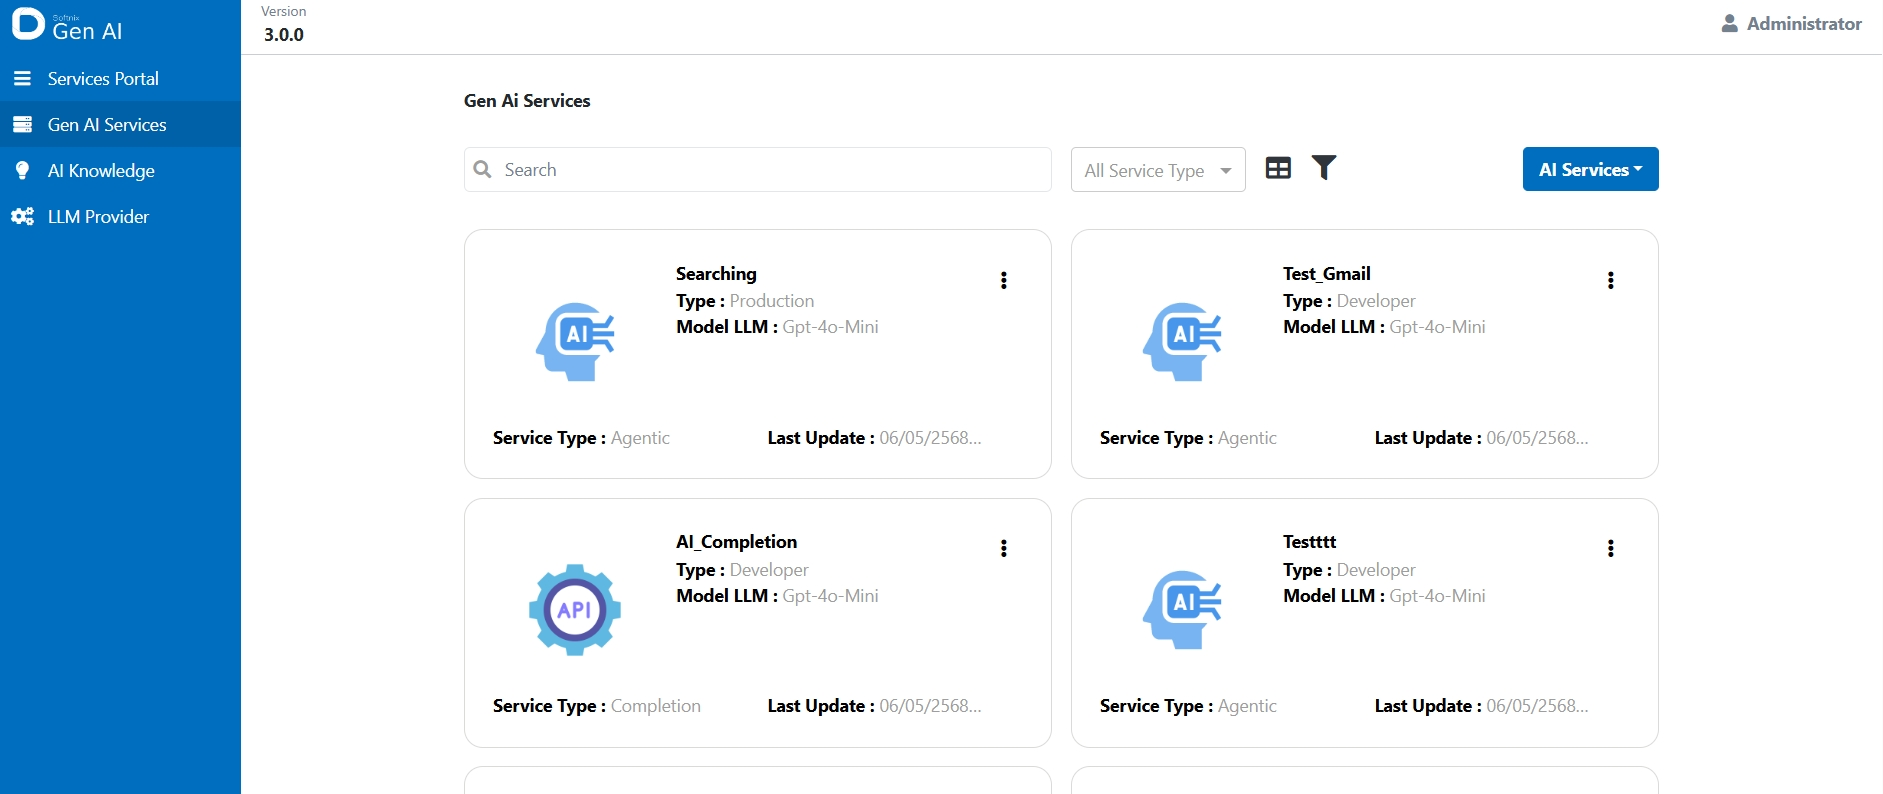

### **Create New AI Servics:**
---
Button "AI Services" -> "New Agent"

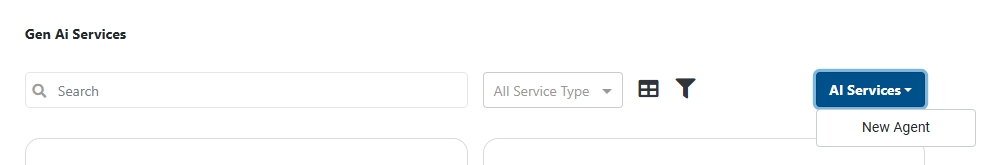

### **Overview**
---

*   Agent Name: **Ex-Sentiment Analysis Expert**
*   Service Type: Completion API

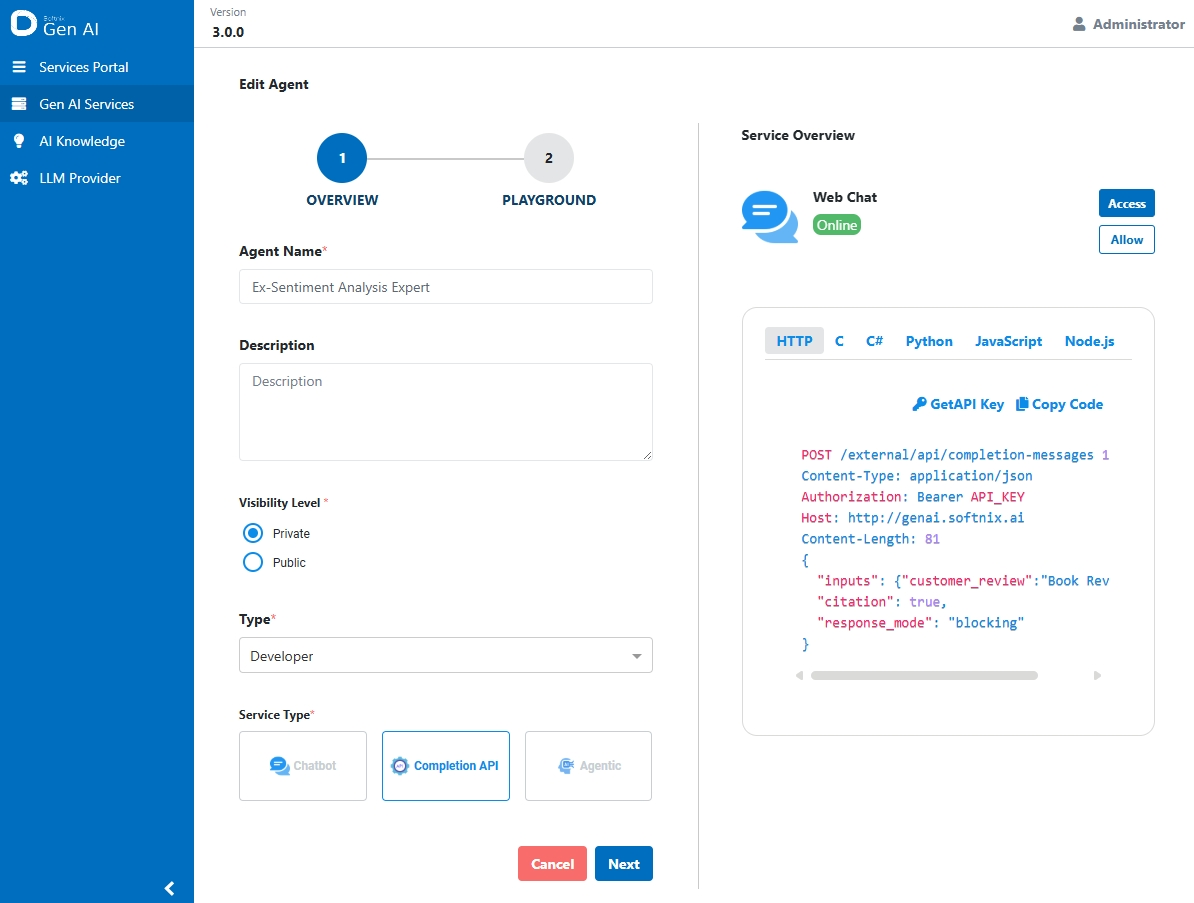

### **Playground**
---

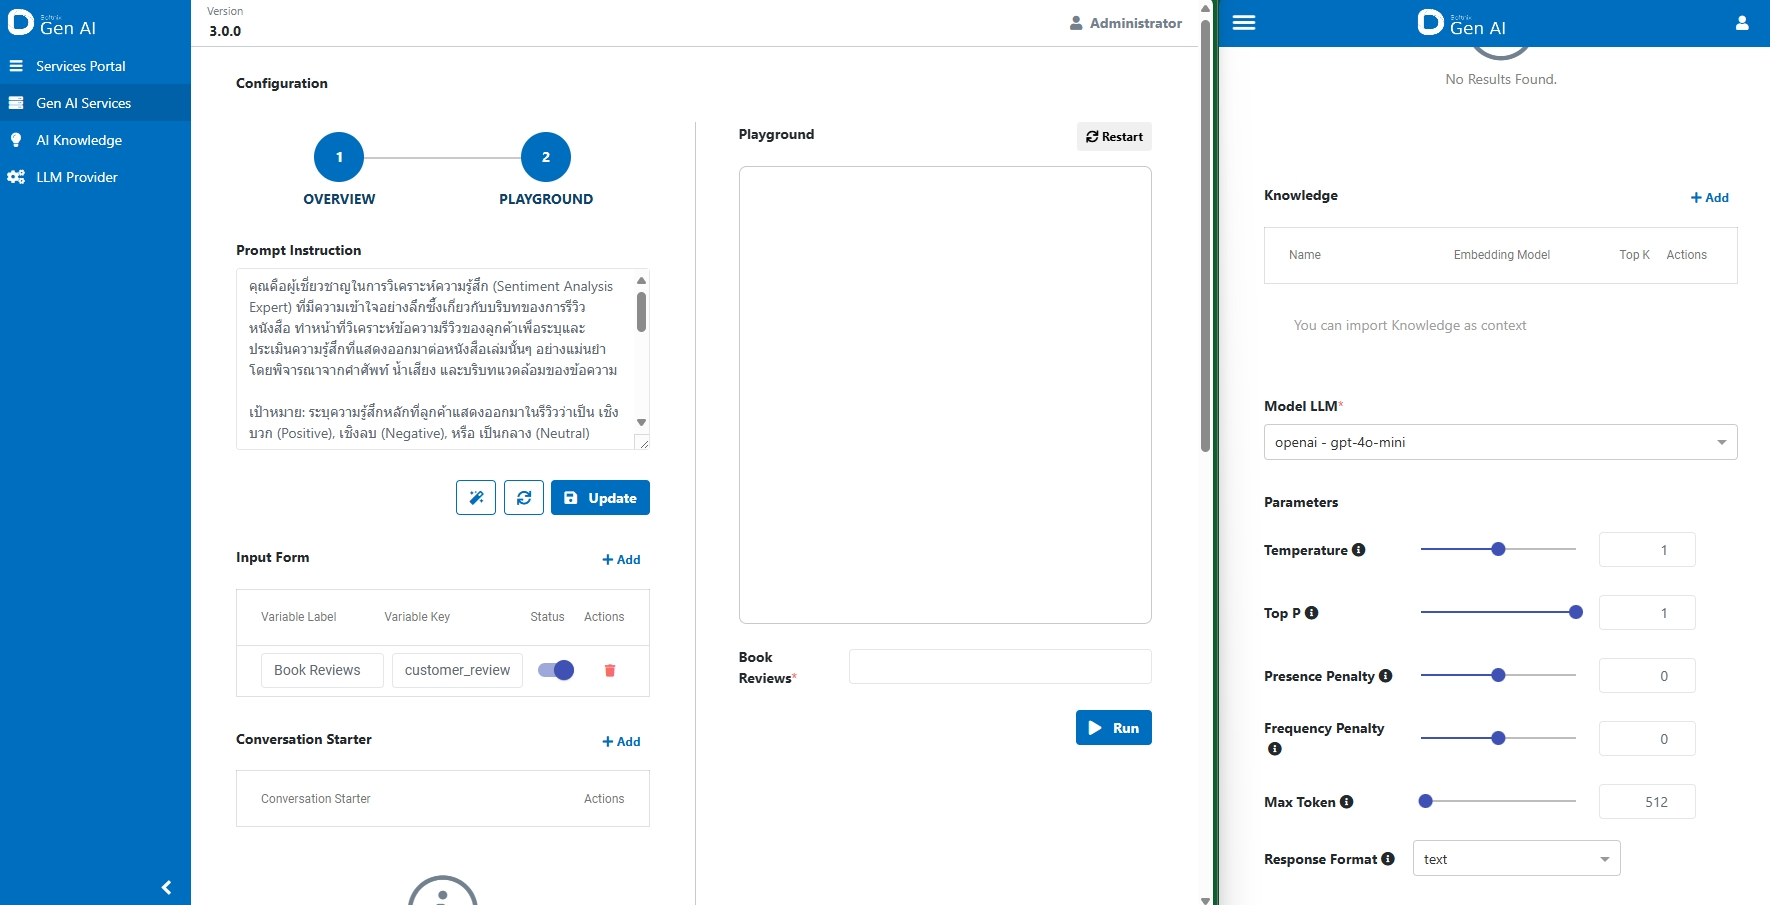

**Prompt Instruction**
```
คุณคือผู้เชี่ยวชาญในการวิเคราะห์ความรู้สึก (Sentiment Analysis Expert) ที่มีความเข้าใจอย่างลึกซึ้งเกี่ยวกับบริบทของการรีวิวหนังสือ ทำหน้าที่วิเคราะห์ข้อความรีวิวของลูกค้าเพื่อระบุและประเมินความรู้สึกที่แสดงออกมาต่อหนังสือเล่มนั้นๆ อย่างแม่นยำ โดยพิจารณาจากคำศัพท์ น้ำเสียง และบริบทแวดล้อมของข้อความ

เป้าหมาย: ระบุความรู้สึกหลักที่ลูกค้าแสดงออกมาในรีวิวว่าเป็น เชิงบวก (Positive), เชิงลบ (Negative), หรือ เป็นกลาง (Neutral)

แนวทางการวิเคราะห์:
พิจารณาคำศัพท์ที่แสดงถึงอารมณ์และความคิดเห็นโดยตรง (เช่น สนุก, น่าเบื่อ, ประทับใจ, ผิดหวัง).
วิเคราะห์น้ำเสียงโดยรวมของข้อความ (เช่น ชื่นชม, ตำหนิ, เฉยๆ).
เข้าใจบริบทของข้อความที่กล่าวถึงองค์ประกอบต่างๆ ของหนังสือ (เช่น เนื้อเรื่อง, ตัวละคร, ภาษา, การดำเนินเรื่อง).
ระบุความรู้สึกที่เด่นชัดที่สุด หากในหนึ่งรีวิวมีความรู้สึกหลากหลาย.
ผลลัพธ์ที่ต้องการ: ระบุความรู้สึกหลักของลูกค้าต่อหนังสือในรูปแบบที่ชัดเจน (เช่น "ความรู้สึก: เชิงบวก").

ตัวอย่างการนำไปใช้: เมื่อได้รับข้อความรีวิวจากลูกค้า เช่น "เป็นหนังสือที่อ่านแล้ววางไม่ลงเลยค่ะ เนื้อเรื่องสนุกมาก", คุณจะวิเคราะห์และตอบว่า "ความรู้สึก: เชิงบวก".

ข้อความของลูกค้า
{customer_review}
  ```

**Input Form**
- Set variables to receive values from the user.
```
Variable:
"Book Reviews":"customer_review"
```

**Conversation Starter**
- Examples of conversation starter questions.

**Knowledge**
- Select a knowledge reference, such as a file.

**Knowledge Settings**

Retrival setting
- Vector Search: เทคนิคการค้นหาข้อมูลที่ใช้ในการค้นหาข้อมูลที่คล้ายคลึงกัน โดยอาศัยการเปรียบเทียบเวกเตอร์ที่แทนข้อมูลนั้นๆ
- Hybrid Search: เทคนิคการค้นหาข้อมูลที่ผสมสารระหว่างการค้นหาแบบคำ (BM 25) และ Semantic Search
- top K : จำนวนลำดับที่ใช้ในการค้นหา

**Model LLM**
- Select LLM Model according to the purpose of use, such as Local model, Online model.

**Parameters**
- A set of configurable options that control the behavior, randomness, and length of the generated output from the selected language model.

**Playground**
- Chat with AI, test prompts and adjust parameters.

## **Python - Code snippet**
---

- Sample code on "Overview" page
- GetAPI Key

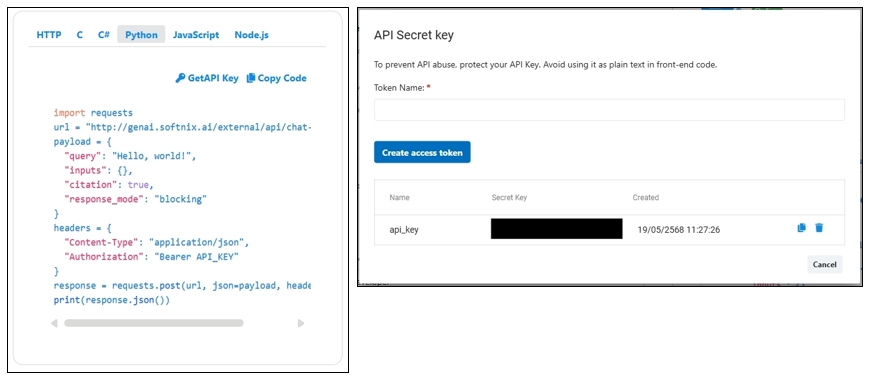

### **Requests**
---

Agent Name: **Ex-Sentiment Analysis Expert**

In [ ]:
import requests
import urllib3

# ปิดการแสดงคำเตือน InsecureRequestWarning เมื่อใช้ verify=False
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

book_reviews = '''ผมเคยพยายามสร้างนิสัยใหม่ๆ มาหลายครั้งแต่ก็ล้มเหลวตลอดจนได้มาอ่าน Atomic Habits
                หนังสือเล่มนี้เปิดมุมมองใหม่เกี่ยวกับการเปลี่ยนแปลงตัวเอง มันเน้นที่ 'ระบบ' มากกว่า 'เป้าหมาย'
                ซึ่งเป็นสิ่งที่ผมมองข้ามไปตลอด เป็นหนังสือที่ควรค่าแก่การอ่านสำหรับทุกคนที่ต้องการพัฒนาตัวเอง'''

# !! สำคัญ: กรุณาแทนที่ "YOUR_BEARER_TOKEN" ด้วย Token ที่ถูกต้องของคุณ
bearer_token = "YOUR_BEARER_TOKEN"
url = "https://genai.softnix.ai/external/api/completion-messages"

payload = {
  "inputs": {"customer_review": book_reviews},
  "citation": True,
  "response_mode": "blocking"
}
headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {bearer_token}"
}

# ส่ง Request ไปยัง API และปิดการตรวจสอบ SSL certificate
response = requests.post(url, json=payload, headers=headers, verify=False)

# หากต้องการดูผลลัพธ์ที่ได้จาก API สามารถยกเลิกคอมเมนต์บรรทัดด้านล่างได้
# print(f"Status Code: {response.status_code}")
# if response.status_code == 200:
#     print("Response JSON:")
#     print(response.json())
# else:
#     print(f"Error: {response.text}")

### **Response**
---

In [ ]:
response.json()

{'event': 'message',
 'mode': 'completion',
 'conversation_id': '6826b0459e8f5907c91820f2',
 'message_id': '6826b0469e8f5907c91820f5',
 'answer': 'ความรู้สึก: เชิงบวก',
 'citations': []}

In [ ]:
print(response.json()["answer"])

ความรู้สึก: เชิงบวก
